In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
df1=pd.read_csv("BMW.csv")
df2 =pd.read_csv("Toyota.csv")
df3 =pd.read_csv("audi.csv")
df4 =pd.read_csv("citroen.csv")
df5 =pd.read_csv("fiat.csv")
df6 =pd.read_csv("ford.csv")
df7 =pd.read_csv("honda.csv")
df8 =pd.read_csv("hyundai.csv")
df9 =pd.read_csv("kia.csv")
df10 =pd.read_csv("mazda.csv")
df11 =pd.read_csv("mercedes-benz.csv")
df12=pd.read_csv("peugeot.csv")
df13=pd.read_csv("renault.csv")
df14=pd.read_csv("seat.csv")
df15=pd.read_csv("skoda.csv")

df = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], ignore_index=True)

In [3]:
df.head()

,Fiyat,Marka,Seri,Yil,Yakit,Vites,Km,KasaTipi,Beygir,CC,Cekis,Renk,Garanti,Kimden,Takas
0,240,BMW,5,2014,Dizel,Yarı,120.000,Sedan,218,1995,4WD,Beyaz,Evet,Galeriden,Evet
1,274.9,BMW,5,2014,Dizel,Yarı,86.000,Sedan,218,1995,4WD,Beyaz,Evet,Galeriden,Evet
2,219.75,BMW,5,2016,Benzin,Yarı,59.000,Sedan,170,1592,Arkadan,Beyaz,Evet,Sahibinden,Hayır
3,162.5,BMW,5,2012,Dizel,Yarı,190.000,Sedan,184,1995,Arkadan,Beyaz,Hayır,Galeriden,Evet
4,99.95,BMW,3,2011,Dizel,Otomatik,181.499,Sedan,184,1995,Arkadan,Gri,Evet,Galeriden,Evet


In [4]:
uniq=df.apply(lambda x: len(x.unique()))
nan_descript=df.apply(lambda x: sum(x.isnull()))
print(uniq)
print(nan_descript)

Fiyat       2401
Marka         15
Seri         188
Yil           45
Yakit          3
Vites          3
Km          3069
KasaTipi       8
Beygir       168
CC           230
Cekis          4
Renk          18
Garanti        2
Kimden         2
Takas          3
dtype: int64
Fiyat        0
Marka        0
Seri         0
Yil          0
Yakit        0
Vites        0
Km           0
KasaTipi     0
Beygir       0
CC           0
Cekis        0
Renk         0
Garanti      0
Kimden       0
Takas       28
dtype: int64


In [5]:
list = []

for i in df["Fiyat"]:
    if type(i) == str:
        try: 
            i = i.replace(" ","")
            i = i.replace(".","")
            i = int(i)
            i = i/1000
        
        except AttributeError:
            i = i    

    list.append(i)
list2 = []   
for i in list:
    i = i * 1000
    list2.append(i)

df["Fiyat"]= list2

list5 = []

In [6]:
for i in df["Yil"]:
    i = i.replace(" ","")
    
    try:
        i = i.replace("Cumhuriyet","2013")
    except AttributeError:
        i = i
    
    try:
        i = i.replace("Mh.","2013")
    except AttributeError:
        i = i
    
    try:
        i=i.replace("OSB","2013")
    except AttributeError:
        i = i
    i=int(i)
    list5.append(i)
    
df["Yil"] = list5

In [7]:
list3 = []
  
for i in df["Km"]:
    try:
        i = i.replace("Belirtilmemiş ","50.000")
    except AttributeError:
        i = i
    
    
    
    
    if type(i) == str:
        
        try: 
            i = i.replace(" ","")
            i = i.replace(".","")
            i = int(i)
            i = i/1000
        
        except AttributeError:
            i = i   
    
    list3.append(i)
df["Km"]= list3

list4 = []   
for i in list3:
    i = i * 1000
    list4.append(i)

df["Km"]= list4

In [8]:
df["Km"]= list4

k =[]
for i in range(0,14991):
    if df.iloc[i]['Km'] < 15000 and df.iloc[i]['Yil'] <= 2009:
        k.append(i)
for i in k:
    df.drop(i, inplace = True)

In [9]:
df.drop(8139,inplace=True)

df["Takas"].fillna(method="ffill",inplace=True)

df = df.reset_index()

In [10]:
j =[]
for i in range(0,14850):
    if df.iloc[i]["CC"] == "Belirtilmemiş ":
        j.append(i)
for i in j:
    
    df.drop(i, inplace = True)


list25 = []
for i in df["CC"]:
    if type(i) == str:
        try: 
            i = i.replace(" ","")
            
            i = int(i)
            
        
        except AttributeError:
            i = i  
    list25.append(i)    
df["CC"]= list25

In [11]:
df = df.reset_index()
k =[]
for i in range(0,14858):
    if df.iloc[i]['Km'] > 1000000 or df.iloc[i]['Fiyat'] > 900000 or df.iloc[i]['CC'] > 4000 or df.iloc[i]['Beygir'] > 400 :
        k.append(i)
for i in k:
    df.drop(i, inplace = True)

df.drop("index",axis= 1 ,inplace =True)
df.drop("level_0",axis= 1 ,inplace =True)

export_csv = df.to_csv (r'C:\\Users\\DKRKLK\\Desktop\\İTÜ PROJE\\arabalarson.csv', index = None, header=True)

# Regression Analysis

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data = df
enkod = ["Vites","Marka","Cekis","KasaTipi","Yakit","Seri","Renk","Garanti","Kimden","Takas"]
for i in enkod:
    df[i] = le.fit_transform(df[i])

import statsmodels.formula.api as sm
Xl = df.iloc[:,[1,2,3,4,5,6,8,9,10,11,12,13,14]].values
yl= df.iloc[:,0:1].values
r = sm.OLS(endog=yl,   exog =Xl).fit()
print(r.summary())

new_data = pd.get_dummies(new_data, columns=["Vites","Marka","Cekis","KasaTipi","Yakit","Seri","Renk","Kimden"])
print(new_data)
discpt=new_data.describe()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     7449.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:15:47   Log-Likelihood:            -1.7671e+05
No. Observations:               14795   AIC:                         3.534e+05
Df Residuals:                   14782   BIC:                         3.535e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           256.4008     76.523      3.351      0.0

In [13]:
x= new_data.iloc[:,1:].values
y = new_data.iloc[:,0:1].values

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
print("Linear Regression")
print(lin_reg.predict(x_test))
print("Linear Regression r2")
print(r2_score(y_test,lin_reg.predict(x_test)))

op = lin_reg.predict(x_test)

Linear Regression
[[ 38239.74429738]
 [220832.35566858]
 [ 55617.28111683]
 ...
 [106229.93484519]
 [ 69694.65915047]
 [107169.74810125]]
Linear Regression r2
0.8141847128126876


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)
print(lin_reg2.predict(poly_reg.fit_transform(x_test)))
print("R2 Score Polynomial degree 4")
print(r2_score(y_test,lin_reg2.predict(poly_reg.fit_transform(x_test))))

[[1.000e+00 2.000e+03 2.010e+05 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.008e+03 1.800e+04 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.017e+03 4.100e+04 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [1.000e+00 1.998e+03 2.390e+05 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.008e+03 1.460e+05 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.010e+03 3.074e+05 ... 1.000e+00 0.000e+00 0.000e+00]]


In [15]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x_train)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y_train)

from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_olcekli,y_olcekli)
print("SVR")
print(svr_reg.predict(x_test))
print("R2 SVR")
print(r2_score(y_test,svr_reg.predict(x_test)))

C:\Users\DKRKLK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DKRKLK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR
[-0.22449759 -0.22449759 -0.22449759 ... -0.22449759 -0.22449759
 -0.22449759]
R2 SVR
-1.3672650537025612


In [16]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train,y_train)
Z = x_test + 0.5
K = x_test - 0.4
print("Decision Tree")
print(r_dt.predict(x_test))
print("Decision Tree R2 degeri:")
print(r2_score(y_test, r_dt.predict(x_test)))
dh = r_dt.predict(x_test)

Decision Tree
[ 38250. 168000.  40750. ... 113000.  65000. 125000.]
Decision Tree R2 degeri:
0.8863069523994557


In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(x_train,y_train)
print("Random Forest")
print(rf_reg.predict(x_test))
print("Random Forest R2 degeri:")
print(r2_score(y_test, rf_reg.predict(x_test)) )
print(r2_score(y_test, rf_reg.predict(K)) )
print(r2_score(y_test, rf_reg.predict(Z)) )
rf =  rf_reg.predict(x_test)


C:\Users\DKRKLK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest
[ 38550.  219675.   50749.7 ... 124140.   69530.  125000. ]
Random Forest R2 degeri:
0.9340173459658095
0.9340173459658095
0.9340634884125263


In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, rf))
print(rms)


17068.962150001047


In [19]:
dataset = pd.DataFrame({'y_test': y_test[:,0], 'rf': rf[:,]})

In [20]:
y_test[:,0]

array([ 38250., 167500.,  55000., ..., 123000.,  61500., 123000.])

In [21]:
xtrain = pd.DataFrame({'y_test': y_test[:,0], 'op': op[:,0]})
ytrain = pd.DataFrame({'y_test': y_test[:,0], 'op': op[:,0]})

In [22]:
print(dataset)

        y_test             rf
0      38250.0   38550.000000
1     167500.0  219675.000000
2      55000.0   50749.700000
3      68500.0   60085.000000
4      47000.0   42862.500000
5      39950.0   18549.800000
6      43500.0   43740.000000
7      41000.0   40605.000000
8      85000.0   73675.000000
9      73500.0   63500.000000
10    104990.0  101080.000000
11     75500.0   74925.000000
12     62500.0   60015.000000
13    125500.0  149660.000000
14    268000.0  282495.000000
15     54000.0   51850.000000
16     65000.0   51570.000000
17     50000.0   44855.000000
18     90000.0   75080.000000
19     47000.0   46990.000000
20     53000.0   53530.000000
21    120000.0  124650.000000
22     45750.0   48395.000000
23     17500.0   18530.000000
24     59750.0   55215.000000
25     54000.0   53780.000000
26    121500.0  121725.000000
27     17000.0   19080.000000
28    116750.0  114185.000000
29     35999.0   34524.800000
...        ...            ...
4853   72000.0   83925.000000
4854  1215

In [24]:
import seaborn as sns

C:\Users\DKRKLK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


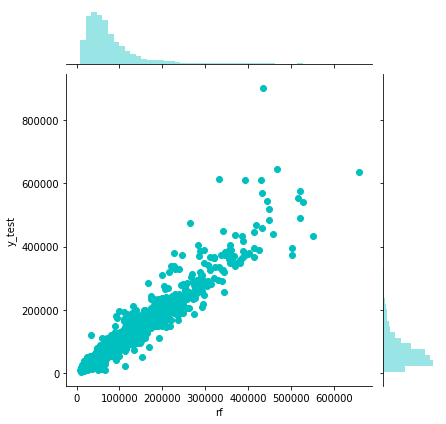

In [25]:
sns.jointplot(x="rf",y="y_test",data=dataset,color='c')

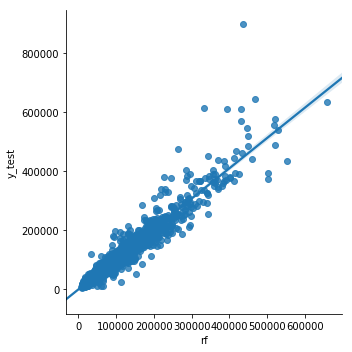

In [26]:
sns.lmplot(x="rf",y="y_test",data=dataset)